In [13]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('Ice_cream selling data.csv')
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


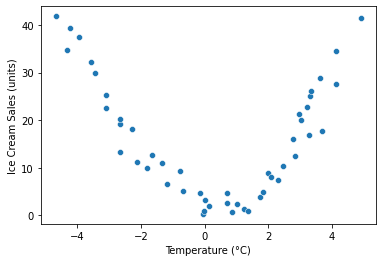

In [11]:
sns.scatterplot(df['Temperature (°C)'],df['Ice Cream Sales (units)'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


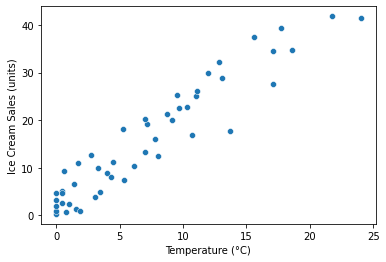

In [10]:
sns.scatterplot((df['Temperature (°C)']*df['Temperature (°C)']),df['Ice Cream Sales (units)'])
plt.show()

In [43]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
import numpy as np
df['BMI']=np.where(df['BMI']<18.5,'uw',np.where(df['BMI']<24.9,'nw',np.where(df['BMI']<29.9,'ow','o')))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,o,0.627,50,1
1,1,85,66,29,0,ow,0.351,31,0
2,8,183,64,0,0,nw,0.672,32,1
3,1,89,66,23,94,ow,0.167,21,0
4,0,137,40,35,168,o,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,o,0.171,63,0
764,2,122,70,27,0,o,0.340,27,0
765,5,121,72,23,112,ow,0.245,30,0
766,1,126,60,0,0,o,0.349,47,1


In [47]:
# pd.getdummies()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']]
y=df['Outcome']  #
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
modal=KNeighborsClassifier(n_neighbors=3)
modal.fit(x_train,y_train)
y_pred=modal.predict(x_test)
print(accuracy_score(y_pred,y_test))
# 
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
modal=KNeighborsClassifier(n_neighbors=3)
modal.fit(x_train_scaled,y_train)
y_pred=modal.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

0.6558441558441559
0.6948051948051948


In [49]:
KNeighborsClassifier??

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
y_act=['cat','dog','dog','cat','dog','dog','cat','dog']
y_pred=['cat','cat','dog','dog','dog','dog','cat','cat']
print(confusion_matrix(y_act,y_pred,labels=['cat','dog']))
print(accuracy_score(y_act,y_pred))
print(classification_report(y_act,y_pred))

[[3 2]
 [1 2]]
0.625
              precision    recall  f1-score   support

         cat       0.50      0.67      0.57         3
         dog       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8



In [59]:
confusion_matrix??

In [60]:
from sklearn.metrics import confusion_matrix,classification_report
y_act=['cat','dog','dog','ant','cat','dog','dog','cat','ant','dog']
y_pred=['cat','cat','ant','dog','dog','dog','dog','cat','ant','cat']
print(confusion_matrix(y_act,y_pred,labels=['cat','dog','ant']))
print(accuracy_score(y_act,y_pred))
print(classification_report(y_act,y_pred))

[[2 1 0]
 [2 2 1]
 [0 1 1]]
0.5
              precision    recall  f1-score   support

         ant       0.50      0.50      0.50         2
         cat       0.50      0.67      0.57         3
         dog       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.52      0.51        10
weighted avg       0.50      0.50      0.49        10



In [14]:
df=pd.read_csv('titanic.csv')
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [15]:
df.isna().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
survived       0
dtype: int64

In [16]:
df.drop(columns=['name','cabin'],inplace=True)

In [17]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,female,29.0000,0,0,24160,211.3375,S,1
1,1,male,0.9167,1,2,113781,151.5500,S,1
2,1,female,2.0000,1,2,113781,151.5500,S,0
3,1,male,30.0000,1,2,113781,151.5500,S,0
4,1,female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,2665,14.4542,C,0
1305,3,female,NaN,1,0,2665,14.4542,C,0
1306,3,male,26.5000,0,0,2656,7.2250,C,0
1307,3,male,27.0000,0,0,2670,7.2250,C,0


In [18]:
df['age']=df['age'].fillna(df['age'].mean())

In [19]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,female,29.000000,0,0,24160,211.3375,S,1
1,1,male,0.916700,1,2,113781,151.5500,S,1
2,1,female,2.000000,1,2,113781,151.5500,S,0
3,1,male,30.000000,1,2,113781,151.5500,S,0
4,1,female,25.000000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,2665,14.4542,C,0
1305,3,female,29.881135,1,0,2665,14.4542,C,0
1306,3,male,26.500000,0,0,2656,7.2250,C,0
1307,3,male,27.000000,0,0,2670,7.2250,C,0


In [20]:
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    2
survived    0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,female,29.000000,0,0,24160,211.3375,S,1
1,1,male,0.916700,1,2,113781,151.5500,S,1
2,1,female,2.000000,1,2,113781,151.5500,S,0
3,1,male,30.000000,1,2,113781,151.5500,S,0
4,1,female,25.000000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,2665,14.4542,C,0
1305,3,female,29.881135,1,0,2665,14.4542,C,0
1306,3,male,26.500000,0,0,2656,7.2250,C,0
1307,3,male,27.000000,0,0,2670,7.2250,C,0


In [23]:
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
survived    0
dtype: int64

In [24]:
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
lb=Q1-1.5*IQR
up=Q3+1.5*IQR
df=df[(df['fare'] >lb) & (df['fare']<up)]


In [25]:
df

,pclass,sex,age,sibsp,parch,ticket,fare,embarked,survived
5,1,male,48.000000,0,0,19952,26.5500,S,1
7,1,male,39.000000,0,0,112050,0.0000,S,0
8,1,female,53.000000,2,0,11769,51.4792,S,1
9,1,male,71.000000,0,0,PC 17609,49.5042,C,0
14,1,male,80.000000,0,0,27042,30.0000,S,1
...,...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,2665,14.4542,C,0
1305,3,female,29.881135,1,0,2665,14.4542,C,0
1306,3,male,26.500000,0,0,2656,7.2250,C,0
1307,3,male,27.000000,0,0,2670,7.2250,C,0
